In [1]:
#importing all the required libraries-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Importing the loan.csv file-

loan= pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Let's have a quick look at the shape of our DataFrame-
loan.shape

(39717, 111)

__We have a total of 111 attributes and we do not require them all. So let's keep our Dataframe with relevant attributes.__

After carefully analyzing all the columns, we will be removing the following columns in the following order:-
1. Removing all the columns by index-slicing that goes beyond column-__'total_rec_prncp'__, i.e. from __*total_rec_int*__ with index-41.
2. And a list of a few irrelevant columns which is stored in variable- __[irrelevant_cols]__

In [4]:
loan.drop(loan.columns[41:], axis=1, inplace= True)

In [5]:
#These columns does not seem to be useful for our analysis so lets remove them as well-
irrelevant_cols=['id', 'member_id', 'funded_amnt', 'emp_title', 'pymnt_plan', 'url', 
                 'desc','zip_code','addr_state', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths',
                 'mths_since_last_record', 'mths_since_last_delinq', 'pub_rec', 'initial_list_status', 
                 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'issue_d']

loan.drop(irrelevant_cols, axis=1, inplace=True)

## Note:-
Further in our analysis, we will be considering funded_amnt_inv instead of loan_amnt.
The reason why we will be considering __loan amount funded by investors__ instead of loan amount__ is that, despite the amount approved by the Lending club, it's the investor's decision as to how much amount should be approved to a particular applicant.
   
#### Personal hypothesis for this reason-
Lending clubs, at their initial stage, lend their own money to customers to gain a boost in their business aiming to create a significant customer base. Once the foundation becomes strong with time, inversely affecting their monetary balance, investors come into the picture. Hence, the money that Lending clubs lend to their customers is coming from investors.

In [6]:
#Now lets look at what we are left with in our DataFrame:-
loan.shape

(39717, 21)

In [7]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,title,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,Computer,27.65,3,13648,83.70%,9,5863.155187,5000.00
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,bike,1.00,3,1687,9.40%,4,1008.710000,456.46
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,real estate business,8.72,2,2956,98.50%,10,3005.666844,2400.00
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,personel,20.00,10,5598,21%,37,12231.890000,10000.00
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,Personal,17.94,15,27783,53.90%,38,3513.330000,2475.94


# A. Let's clean our DataFrame-

Getting to know the Dtypes of each columns and looking if there are any null values in our DataFrame-

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  title                39706 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

## 1. Handling 'term' column-

As seen from the above information, the Dtype of column __' term'__ is __*'object'*__ whereas the column term contains information about tenures of loans of different applicants.

__Reason:-__ This is because of the presence of string-'months' in it. So we will be extracting only integer figures from the 'term' column which will eventually convert the Dtype of the term column into int64.

In [9]:
loan['term'] = loan.term.apply(lambda x: int(str(x).replace("months", "").strip()))
loan.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [10]:
#Let us confirm if the Dtype of the column __term__ has changed or not-
loan.term.dtype

dtype('int64')

## 2. Handling 'int_rate' column-

The Dtype of __'int_rate'__ is __*'object'*__ because of the presence of __'%'__ in it. Removing this special symbol to convert the dtype of this column to the appropriate one.

In [11]:
loan['int_rate'] = loan.int_rate.apply(lambda x: float(str(x).replace("%", "").strip()))

In [12]:
#Let's confirm if we have successfully extracted numbers only-
loan.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [13]:
#Confirming the data type of 'int_rate'-
loan.int_rate.dtype

dtype('float64')

## 3. Handling 'emp_length' column-

Going ahead, as we can see from the info() of our data frame, the column __emp_length__ seems to have 38642 non-null values out of total entries which is 39717. Which means there are 1075 null values present in that column. 
Also, the Dtype of __emp_length__ is object whereas it contains the information about job experience of different applicants in years. 

Let's handle them one by one-

1. 'emp_length' indicates the employment length in years. We cannot assume any employee's length and impute them by any metrics. We need to have a solid and reliable source of information to impute such values which we do not have so it's better to delete all the rows having null values in 'emp_length' column.

In [14]:
loan = loan[~loan.emp_length.isnull()]

In [15]:
loan.emp_length.isnull().sum() # Now we have 0 null values in emp_length

0

In [16]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

2. 'emp_length' contains some special symbols in it like '+', '<' and string-'year'/'years' in it which makes its Dtype as the object. Let's extract integers from this column and the Dtype will be int64.

In [17]:
loan['emp_length'] = loan.emp_length.apply(lambda x: int(str(x).replace("years","").replace("year","").replace("+","").replace("<","").strip()))

In [18]:
#Let's confirm if we have successfully extracted integers-
loan.emp_length.unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [19]:
#Confirming the data type-
loan.emp_length.dtype

dtype('int64')

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38642 non-null  int64  
 1   funded_amnt_inv      38642 non-null  float64
 2   term                 38642 non-null  int64  
 3   int_rate             38642 non-null  float64
 4   installment          38642 non-null  float64
 5   grade                38642 non-null  object 
 6   sub_grade            38642 non-null  object 
 7   emp_length           38642 non-null  int64  
 8   home_ownership       38642 non-null  object 
 9   annual_inc           38642 non-null  float64
 10  verification_status  38642 non-null  object 
 11  loan_status          38642 non-null  object 
 12  purpose              38642 non-null  object 
 13  title                38632 non-null  object 
 14  dti                  38642 non-null  float64
 15  open_acc             38642 non-null 

In [21]:
len(loan.title.unique())

19149

We do not need __' title'__ as it contains the reasons why the borrower is opting for credits. The number of unique values in this column is 19149 so we cannot analyze or compare it with others attributes in anyways.

Let's delete this column as well-

In [22]:
loan.drop(['title'], axis=1, inplace=True)

In [23]:
loan.shape #Checking the shape of our dataframe.

(38642, 20)

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38642 non-null  int64  
 1   funded_amnt_inv      38642 non-null  float64
 2   term                 38642 non-null  int64  
 3   int_rate             38642 non-null  float64
 4   installment          38642 non-null  float64
 5   grade                38642 non-null  object 
 6   sub_grade            38642 non-null  object 
 7   emp_length           38642 non-null  int64  
 8   home_ownership       38642 non-null  object 
 9   annual_inc           38642 non-null  float64
 10  verification_status  38642 non-null  object 
 11  loan_status          38642 non-null  object 
 12  purpose              38642 non-null  object 
 13  dti                  38642 non-null  float64
 14  open_acc             38642 non-null  int64  
 15  revol_bal            38642 non-null 

## 4. Handling 'revol_util' column-
The revol_until column contains the information of revolving line utilization rate. Meaning- how much amount (in %) is the applicant using from all his available line of credits.

In [25]:
loan.revol_util.value_counts()

0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1087, dtype: int64

The revol_util column has  '%' symbol in it which makes the data type of this column as object. Let's get rid of this symbol and extract only numbers and convert in into float data type.

In [26]:
loan['revol_util']=loan.revol_util.apply(lambda x: 0 if x==0 else float(str(x).replace('%','').strip()))

In [27]:
loan.revol_util.value_counts() #Checking if we have successfully removed '%' from this column.

0.00     941
0.20      62
63.00     61
66.70     57
40.70     57
        ... 
0.83       1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1087, dtype: int64

In [28]:
loan.revol_util.dtype #The datatype of 'revol_util' is now in the appropriate format.

dtype('float64')

We can also see that revol_util column contains some null values in it. Let's look into that as well.

In [29]:
loan.shape #Checking the shape of our data frame.

(38642, 20)

In [30]:
len(loan[loan.revol_util.isna()]) #Checking how many null values ve have.

47

In [31]:
loan[loan.revol_util.isna()]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
3565,8000,8000.000000,36,19.42,294.95,E,E3,3,RENT,30000.0,Source Verified,Fully Paid,debt_consolidation,18.56,6,0,NaN,10,10706.010820,8000.00
4943,7200,7200.000000,36,14.27,247.03,C,C2,7,RENT,48000.0,Not Verified,Fully Paid,debt_consolidation,15.28,2,0,NaN,25,7306.070000,7200.00
12042,3000,3000.000000,60,22.11,83.05,G,G1,6,OWN,17652.0,Source Verified,Charged Off,other,0.00,3,0,NaN,5,498.490000,113.96
12147,4275,4275.000000,36,15.99,150.28,D,D2,7,MORTGAGE,54500.0,Not Verified,Fully Paid,home_improvement,7.49,2,0,NaN,9,5356.188342,4275.00
13891,2000,1900.000000,36,18.39,72.70,E,E2,1,RENT,24000.0,Not Verified,Charged Off,other,22.60,3,0,NaN,16,89.790000,0.00
17985,20000,4575.003440,60,20.48,535.24,G,G2,10,RENT,42000.0,Verified,Charged Off,debt_consolidation,18.91,3,0,NaN,18,6375.060000,2091.72
18184,1825,1825.000000,36,12.68,61.22,C,C1,1,RENT,19200.0,Not Verified,Fully Paid,major_purchase,16.81,7,0,NaN,11,1930.955066,1825.00
21604,2500,2500.000000,36,16.69,88.75,E,E3,7,RENT,27024.0,Verified,Fully Paid,debt_consolidation,5.24,2,0,NaN,3,3197.342651,2500.00
24663,1000,1000.000000,36,14.84,34.59,D,D1,1,RENT,18000.0,Source Verified,Fully Paid,moving,0.00,11,0,NaN,11,1245.249354,1000.00
24738,3000,3000.000000,36,16.32,105.95,D,D5,4,RENT,30000.0,Source Verified,Fully Paid,other,3.68,4,0,NaN,5,3814.408677,3000.00


We can notice that almost all the applicants who has null values in revoling utilization ration column (revol_util column), has a corresponding revolving balance of 0 units. We have a total of 47 such entries with null values in revol_util column. Let's remove all of these applicants to avoid biased analysis in future.

In [32]:
loan= loan[~loan.revol_util.isna()]

In [33]:
len(loan[loan.revol_util.isna()])

0

In [34]:
loan.shape

(38595, 20)

Now we are left with 38,595 applicants with 20 unique attributes.

# B. Let's do some sanity checks-

In this cleaning method, we will try to find, if any, odd entries which do not belong to the natural behavior or normal range of that particular attribute.

### 1. Let's see if there are any entries where funded amount by investors is greater than the demanded loan amount by the borrowers. If we find any such results then there must be a data entry error.

In [35]:
loan[loan.funded_amnt_inv > loan.loan_amnt]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp


*There are no such rows where the funded amount by investors is greater than the loan amount requested by the applicant.*

### 2. Let's do a quick check on term column
(Term is the tenure of the loan that applicants opts for)

In [36]:
loan.term.unique() 
# We are good to go ahead. No peculiar entries!

array([36, 60], dtype=int64)

*All the loans granted by the Lending club has two tenures only- 36 months and 60 months.*

### 3. Interest rate-
(The interest rates of loans)

In [37]:
loan.int_rate.describe()

count    38595.000000
mean        12.048118
std          3.715935
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

*As we can see that the interest rate varies from as low as 5.42% to as high as 24.59% with an IQR of 5.27% with the mean being 12.05%.*

Going ahead!

### 4. Grades and sub-grades-
(Different grades and sub-grades assigned to loans by Lending Club)

In [38]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

*There are total 7 grades assigned to loans by Lending club, from A to G.*

In [39]:
loan.grade.value_counts()

B    11685
A     9695
C     7914
D     5179
E     2784
F     1025
G      313
Name: grade, dtype: int64

In [40]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

*No strange entries found so far.*

### 5. Employee length-
(Length of employment of applicants)

In [41]:
loan.emp_length.unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [42]:
loan.emp_length.describe()

count    38595.000000
mean         5.094287
std          3.408780
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

*As per the information provided in the data dictionary, we have correct entries in the column- employment length, ranging from 1 year to 10 years.*

__Note__- Here 10 years means 10 years or 10 plus years of employment length.

### 6. Home ownership-
(Home ownership status)

In [43]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

*No unusual entries found so far.*

### 7. Annual income-
(Annual income of applicants)

In [44]:
loan.annual_inc.describe()

count    3.859500e+04
mean     6.963713e+04
std      6.424780e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [45]:
loan.annual_inc.max()

6000000.0

As we can see from the above information, there are applicants in this data frame who seem to have a very lucrative career. The maximum annual income of borrower in our data frame is 60,00,000 units.
Let's dig in some more details about this column.

In [46]:
loan[loan.annual_inc>1000000]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
7247,12025,12000.00000,36,14.27,412.57,C,C2,10,RENT,1782000.0,Not Verified,Fully Paid,debt_consolidation,1.31,9,49208,85.7,30,14847.436820,12025.0
10621,15775,15750.00000,60,12.99,358.85,C,C1,2,MORTGAGE,1250000.0,Verified,Charged Off,debt_consolidation,21.81,10,48258,83.2,28,18301.350000,12799.7
21412,10000,9500.00000,36,6.54,306.68,A,A4,10,OWN,1200000.0,Verified,Fully Paid,debt_consolidation,1.46,6,75706,49.1,13,11008.565030,10000.0
23551,1500,1500.00000,36,6.17,45.75,A,A3,5,MORTGAGE,1900000.0,Source Verified,Fully Paid,credit_card,0.57,17,17396,59.6,36,1562.352995,1500.0
24166,25000,24493.46353,60,15.20,597.38,D,D4,10,RENT,1200000.0,Source Verified,Fully Paid,debt_consolidation,0.41,4,11168,69.8,12,33125.070570,25000.0
25762,12000,12000.00000,36,7.51,373.33,A,A4,1,MORTGAGE,1200000.0,Not Verified,Fully Paid,debt_consolidation,9.17,12,26684,51.9,26,13440.094770,12000.0
27564,5600,5600.00000,60,13.61,129.18,C,C2,10,MORTGAGE,1176000.0,Source Verified,Fully Paid,other,1.22,6,11753,73.5,25,7750.179998,5600.0
28906,4500,4500.00000,60,7.88,90.99,A,A5,8,MORTGAGE,1080000.0,Source Verified,Fully Paid,major_purchase,0.57,7,46337,1.9,20,5262.056984,4500.0
29639,25000,11430.00082,60,10.62,334.08,B,B3,3,MORTGAGE,3900000.0,Not Verified,Fully Paid,home_improvement,0.20,12,3270,10.2,32,20044.620000,15500.0
30107,5000,5000.00000,36,12.73,167.84,C,C1,10,MORTGAGE,6000000.0,Source Verified,Fully Paid,home_improvement,0.01,2,1434,37.7,10,5514.493060,5000.0


#A Very strange relation one can notice from the above data frame is that the applicants having annual income from the range 1000000 units to 6000000 units are applying for loans as low as 1500 units and as high as 25000 units which do not make sense. The dti ratio of the majority of such applicants is also very low.
As we know dti is a debt to Income ratio-the ratio of the sum of all monthly debts to monthly gross salary before tax.
Low dti, indicates that the applicant either has less monthly expenditure or more annual income (which is true for these cases) resulting in more monetary balance. Such applicants are very unlikely to borrow such a small amount of money from banks or lending clubs. Therefore let's remove such data as it might give us unbiased conclusion in the end.

Let's look at the outliers in the column __'annual_inc'__. 

For this, we first need to calculate the values at upper and lower fences.

In [47]:
loan.annual_inc.describe()

count    3.859500e+04
mean     6.963713e+04
std      6.424780e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [48]:
Q3=loan.annual_inc.quantile(0.75)   #finding the 75th percentile value.
Q1=loan.annual_inc.quantile(0.25)   #finding the 25th percentile value.
IQR=Q3-Q1                           #calculating the IQR.
print('The value of Q3 is: ',Q3)
print('The value of Q1 is: ',Q1)
print('The value of IQR is: ',IQR)

Q4= Q3+(1.5*IQR)   #calculating value at upper fence.
Q0= Q1-(1.5*IQR)   #calculating value at lower fence.

print('\nLower fence value (Q0) =',Q0)
print('Upper fence value (Q4) =',Q4)

The value of Q3 is:  83200.0
The value of Q1 is:  41500.0
The value of IQR is:  41700.0

Lower fence value (Q0) = -21050.0
Upper fence value (Q4) = 145750.0


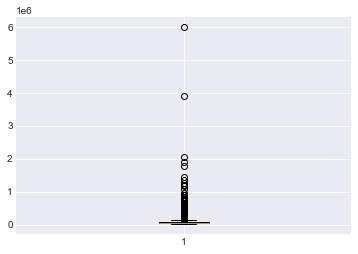

In [49]:
#Let's also plot a boxplot to get a clear picture-
plt.boxplot(loan.annual_inc)
plt.show()

*Since we do not have any applicants with negative salaries, we will ignore the lower fence. The upper fence has a value of approx 145900 units. But let's remove all the applicants (outliers) from our data frame having salaries above 145000 units to avoid any chance of getting biased analysis further.*

In [50]:
loan= loan[loan.annual_inc<=145000] #removing all the applicants having salary above 1,45,000 units pa.

In [51]:
loan.annual_inc.describe()

count     36769.000000
mean      61920.876353
std       28119.114717
min        4000.000000
25%       40000.000000
50%       57016.440000
75%       79000.000000
max      145000.000000
Name: annual_inc, dtype: float64

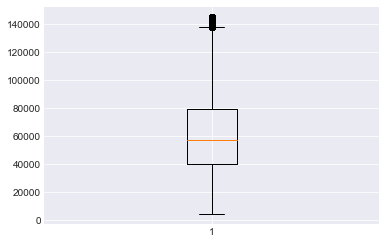

In [52]:
plt.boxplot(loan.annual_inc)
plt.show()

*We have removed all the outliers form the column- annual_inc.*

### 8. Verification status-
(Verification status of income source of applicants by Lending club)

In [53]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

*Verification status column seems ok.*

### 9. Loan status-
(Whether the applicants has fully paid the loan, defaulterd or is still paying the loan)

In [54]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Our aim here is to find the __' risky'__ applicants. We can learn from the __fully-paid__ applicants and compare them with __risky__ ones but we do not need applicants who have their loan status as __' current'__. Such applicants have not labeled with anything yet.

So let's remove all the applicants who are still in the process of repaying their loans.

In [55]:
loan = loan[loan.loan_status!='Current']

In [56]:
loan.loan_status.unique() #Confirming if the current applicants are removed.

array(['Fully Paid', 'Charged Off'], dtype=object)

*We have successfully removed the current applicants.*

Now let's see the shape of our data frame.

In [57]:
loan.shape

(35753, 20)

### 10. Purpose-
(Purpose given by applicant for applying loan)

In [58]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

*No deviant entries here.*

### 11. dti-
(A debt to Income ratio-the ratio of the sum of all monthly debts to monthly gross salary before tax. Low dti, indicates that the applicant either has less monthly expenditure or sufficient annual income. Having low dti is good and preferred.)

In [59]:
loan.dti.describe()

count    35753.000000
mean        13.455380
std          6.646337
min          0.000000
25%          8.370000
50%         13.590000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

*The dti is as low as 0% and goes high upto 29.99%. Does not seem to be abnormal.*

### 12. Revol balance-
(The unpaid portion of the used amount from line of credit that carries over to the next month.)

In [60]:
loan.revol_bal.describe()

count     35753.000000
mean      12438.744889
std       13843.407675
min           0.000000
25%        3621.000000
50%        8625.000000
75%       16304.000000
max      149000.000000
Name: revol_bal, dtype: float64

*The column revol_bal seems fine.*

### 13. Installments-
(Monthly installment paid by borrower once he opts for loan)

In [61]:
loan.installment.describe()

count    35753.000000
mean       314.855089
std        200.080848
min         15.690000
25%        164.860000
50%        273.700000
75%        412.150000
max       1305.190000
Name: installment, dtype: float64

*Nothing abnormal in this column.*

### 14. Open account-
(The number of open/active credit lines a borrower has.)

In [62]:
loan.open_acc.describe()

count    35753.000000
mean         9.202109
std          4.347789
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

*No irregularity in this column.*

### 15. Total account-
(Total number of credit lines a borrower holds.)

In [63]:
loan.total_acc.describe()

count    35753.000000
mean        21.709815
std         11.228745
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

*No abnormal entries found.*

### 16. Total payment-
(Payments received from borrowers till date for total amount funded.)

In [64]:
loan.total_pymnt.describe()

count    35753.000000
mean     11566.911665
std       8451.072165
min          0.000000
25%       5483.010175
50%       9495.652822
75%      15624.234470
max      58563.679930
Name: total_pymnt, dtype: float64

*Nothing spurious here.*

### 17. Total principal amount received-
(Total principal amount received from borrower till date.)

In [65]:
loan.total_rec_prncp.describe()

count    35753.000000
mean      9410.777286
std       6730.838184
min          0.000000
25%       4500.000000
50%       8000.000000
75%      12800.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64

*No error. Good to go ahead*

### 18. Revolving utilization ratio-
(The percentage of utilization of credits from the available line of credits that a borrower has.)

In [66]:
loan.revol_util.describe()

count    35753.000000
mean        48.828081
std         28.258431
min          0.000000
25%         25.500000
50%         49.200000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

*Nothing abnormal in this column.*

### So far we have did all the cleaning process on our data frame. Now we can go ahead and perform several analysis on our data.

# C. Lets go ahead and perform some data analysis-

Checking our final data frame-

In [67]:
#Resetting index as we have removed some rows and columns while cleaning data. Resetting index will ease our analysis further.
loan.reset_index()

,index,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
0,0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Verified,Fully Paid,credit_card,27.65,3,13648,83.7,9,5863.155187,5000.00
1,1,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,Source Verified,Charged Off,car,1.00,3,1687,9.4,4,1008.710000,456.46
2,2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Not Verified,Fully Paid,small_business,8.72,2,2956,98.5,10,3005.666844,2400.00
3,3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Source Verified,Fully Paid,other,20.00,10,5598,21.0,37,12231.890000,10000.00
4,5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Source Verified,Fully Paid,wedding,11.20,9,7963,28.3,12,5632.210000,5000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35748,39711,5000,700.0,36,8.70,158.30,B,B1,5,MORTGAGE,...,Not Verified,Fully Paid,credit_card,15.55,10,66033,23.0,29,5698.603286,5000.00
35749,39712,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,Not Verified,Fully Paid,home_improvement,11.33,13,7274,13.1,40,2822.969293,2500.00
35750,39713,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,Not Verified,Fully Paid,credit_card,6.40,6,8847,26.9,9,9913.491822,8500.00
35751,39714,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,...,Not Verified,Fully Paid,debt_consolidation,2.30,11,9698,19.4,20,5272.161128,5000.00


In [68]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,3,13648,83.7,9,5863.155187,5000.00
1,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,1.00,3,1687,9.4,4,1008.710000,456.46
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,2956,98.5,10,3005.666844,2400.00
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,5598,21.0,37,12231.890000,10000.00
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,9,7963,28.3,12,5632.210000,5000.00


In [69]:
loan.loan_status.value_counts()

Fully Paid     30562
Charged Off     5191
Name: loan_status, dtype: int64

To make our further analysis hassle-free, let's create 2 sub-data frames for our target variable __'loan_status'__.

One for __defaulters__-applicants who have charged off and one for __fully paid applicants__-applicants who have fully paid all the loan before time.

### Note:-
We will be using these terms throughout our analysis:

1. __defaulters = charged off__- applicants who have charged off.
2. __fully = good customers__- applicants who have fully paid the loan.

## *Creating a seperate data frame for defaulters-*

In [70]:
defaulters = loan[loan.loan_status=='Charged Off']

In [71]:
defaulters.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
1,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,1.00,3,1687,9.4,4,1008.71,456.46
8,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,small_business,5.55,11,5210,32.6,13,646.02,162.02
9,5375,5350.0,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Charged Off,other,18.08,2,9279,36.5,3,1476.19,673.48
12,9000,9000.0,36,13.49,305.38,C,C1,1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,10.08,4,10452,91.7,9,2270.70,1256.14
14,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Charged Off,other,7.06,14,11997,55.5,29,7471.99,5433.47


In [72]:
defaulters.shape #Knowing the shape of our dataframe- defaulters.

(5191, 20)

## *Creating a seperate data frame for fully-*

In [73]:
fully = loan[loan.loan_status=='Fully Paid']

In [74]:
fully.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,3,13648,83.7,9,5863.155187,5000.00
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,2956,98.5,10,3005.666844,2400.00
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,10,5598,21.0,37,12231.890000,10000.00
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,9,7963,28.3,12,5632.210000,5000.00
6,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,23.51,7,17726,85.6,11,10110.840000,6985.61


In [75]:
fully.shape #Knowing the shape of our dataframe- fully.

(30562, 20)

### 1. Let's analyse our target variable- loan_status:

In [76]:
#Creating a new sub-dataframe for our target variable with its unique entities in category column and their respective counts in counts column-
d_df=loan.loan_status.value_counts().rename_axis('category').reset_index(name='counts')
d_df

,category,counts
0,Fully Paid,30562
1,Charged Off,5191


In [77]:
#Creating new readable variables and storing the category column and counts column of our newely created dataframe(d_df).

status_label =  d_df.category
status_data  = d_df.counts
status_explode=[0.1,0]

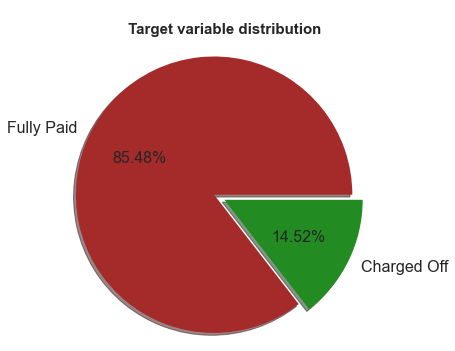

In [78]:
#Plotting a pie chart to get a general idea about our target variable.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(status_data, labels=status_label, autopct='%1.2f%%', explode=status_explode, shadow=True, radius=1.2, colors=['brown','forestgreen'], textprops={'fontsize':16})
plt.title("\n Target variable distribution \n", fontsize=15, loc='center', fontweight='bold')
plt.show()

### Observation-

As seen from the above pie chart, 14.52% of the applicants in our data are defaulters and the rest 85.48% are the applicants who have successfully closed their loans by paying them all in time.

### 2. Let's see what type of home ownership do our applicant's have-

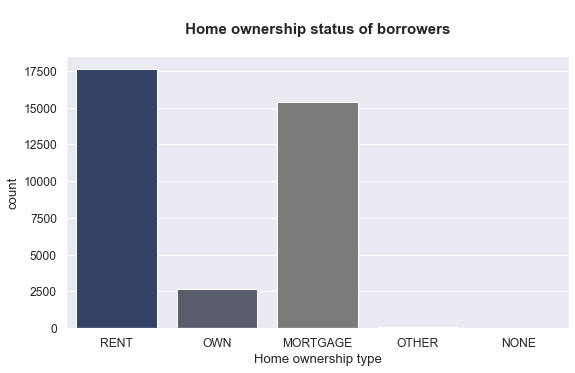

In [79]:
plt.figure(figsize=[9,5])
sns.set(font_scale = 1.1)
sns.countplot('home_ownership', data=loan, palette="cividis")
plt.title("\n Home ownership status of borrowers \n", fontsize=15, fontweight='bold')
plt.xlabel('Home ownership type')

plt.show()

### Observation-
By looking at the above countplot, roughly 17500 applicants provided information that they live in a rented house, followed by approx 15000 of the total population who has their house on mortgage. Almost a little over 2500 people claim to have their self-owned house and the homeownership status like others and none are very trivial.

### 3. Looking at borrower's income verification status done by lending club-

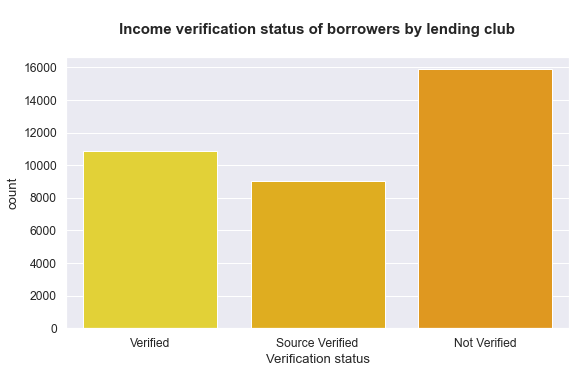

In [80]:
plt.figure(figsize=[9,5])
sns.countplot('verification_status', data=loan, palette="Wistia")
plt.title("\n Income verification status of borrowers by lending club \n", fontsize=15, fontweight='bold')
plt.xlabel('Verification status')
plt.show()

### Observation-
The lending club was successfully able to verify the income of almost 11000 applicants of the total population. 16000 were not varified and close to 9000 were source verified.

### 4. Peeking at the loan grades of our candidates-

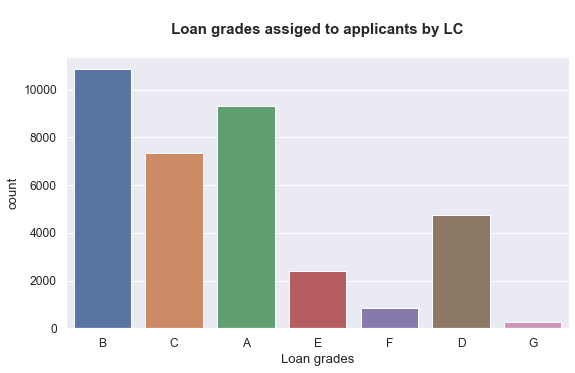

In [81]:
plt.figure(figsize=[9,5])
sns.countplot('grade', data=loan)
plt.title("\n Loan grades assiged to applicants by LC \n", fontsize=15, fontweight='bold')
plt.xlabel('Loan grades')

plt.show()

### Observation-
Nearly 11500 applicants have a B-graded loan which is the highest, followed by A-graded competitors with a whopping size of a roundabout 9000. Behind are the 7500 C-graded contenders. The lowest are the F and G grade with a population of near to 1000 and roughly 300 respectively.

### 5. Let's have a look at the distribution of loan amounts requested by applicants vs the loan amount sanctioned by the investors-

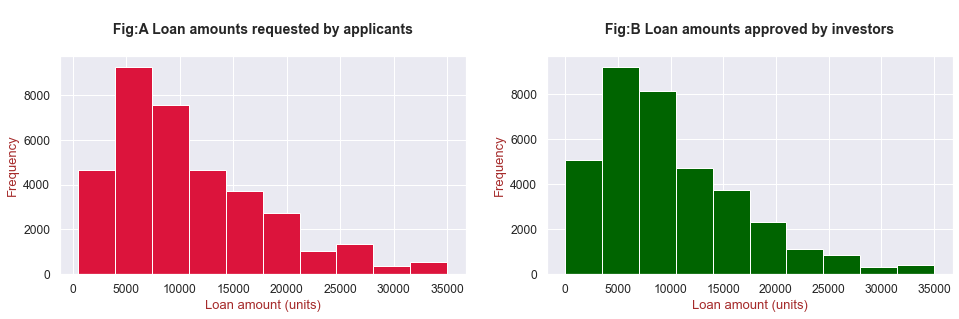

In [82]:
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
plt.hist(loan.loan_amnt, edgecolor='white', color='crimson')
plt.title("\n Fig:A Loan amounts requested by applicants \n", fontsize=14, loc='center', fontweight='bold')
plt.xlabel('Loan amount (units)', color='brown', fontsize=13)
plt.ylabel('Frequency', color='brown', fontsize=13)

plt.subplot(1,2,2)
plt.hist(loan.funded_amnt_inv, edgecolor='white', color='darkgreen')
plt.title("\n Fig:B Loan amounts approved by investors \n", fontsize=14, loc='center', fontweight='bold')
plt.xlabel('Loan amount (units)', color='brown', fontsize=13)
plt.ylabel('Frequency', color='brown', fontsize=13)
plt.show()

### Observation-
The histograms above shows that there is a marginal difference between the requested loan amount and the amount approved by investors for both type of customers. Mostly, the loan amount approved by investors is equal or less that the loan amount requested by applicants.

### 6. Let's see if are able to find some vision from the frequency of tenures of loans for defaulted and fully paid customers-

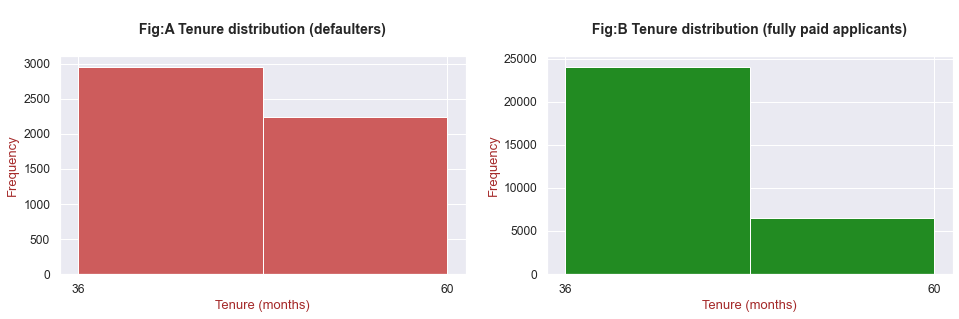

In [83]:
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
plt.hist(defaulters.term, color='indianred', edgecolor='white', bins=2)
plt.title("\n Fig:A Tenure distribution (defaulters) \n", fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)', color='brown', fontsize=13)
plt.ylabel('Frequency', color='brown', fontsize=13)
x=[36,60]
plt.xticks(x)

plt.subplot(1,2,2)
plt.hist(fully.term, color='forestgreen', edgecolor='white', bins=2)
plt.title("\n Fig:B Tenure distribution (fully paid applicants) \n", fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)', color='brown', fontsize=13)
plt.ylabel('Frequency', color='brown', fontsize=13)
plt.xticks(x)

plt.show()

### Observation-

From Fig:A which is for defaulters, there are roughly 3000 applicants out of a total of 5191 charged-off applicants, who had loans of tenure 36 months, contributing about 58%  of the total defaulter population. The rest 42% defaulters had loans with 60 months payback period. 

Similarly, from Fig:B which is for good applicants, approximately 24000 applicants (about 79% of total good applicants) had loans with 36 months tenure and the rest 21% had loans with 60 months tenure.

Long tenured loans accumulates huge interest and we can speculate that, defaulters who had long tenured loans(60 months), would have eventually charged-off. If we overlooked the fact that the majority of applicants defaulted despite of their loans being short termed, long term loans, had not been opted by defaulters, would not have made some of them defaulters anymore. However,  majority of their counterpart(good applicants), opts for less tenured loan.

Hence, the type of tenure one opts for, may give us a vague forthcomming insight for defaulters.

### 7. Comparing the distribution of installement column for defaulters and fully paid applicants-

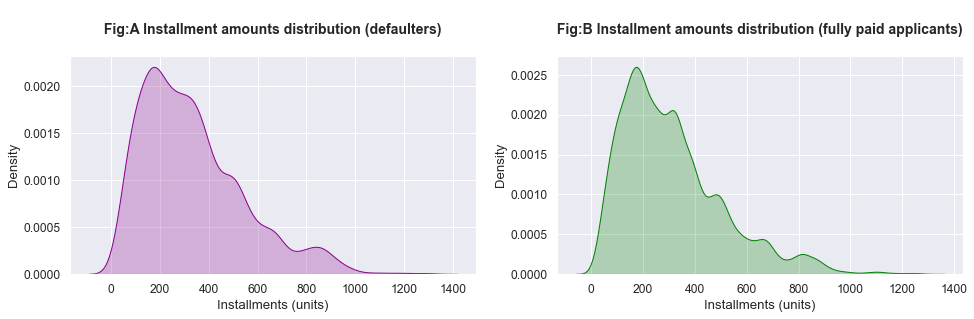

In [84]:
plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
sns.kdeplot(defaulters.installment, color='darkmagenta',shade=True)
plt.title("\n Fig:A Installment amounts distribution (defaulters) \n", fontsize=14, fontweight='bold')
plt.xlabel('Installments (units)')

plt.subplot(1,2,2)
sns.kdeplot(fully.installment, color='green', shade=True)
plt.title("\n Fig:B Installment amounts distribution (fully paid applicants) \n", fontsize=14, fontweight='bold')
plt.xlabel('Installments (units)')

plt.show()

### Observation-
There is no difference in the trend of KDE that could be observed by looking at the distribution of amount of monthly payments that both types of applicants do. Both distribution plots, i.e. plot in Fig: A and plot in Fig: B seems to follow almost the same trend. Maximum population of borrowers are paying installment amounts from range 50 units to 500 units.

### 8. Let's look at the distribution of the interest rates for both type of applicants-

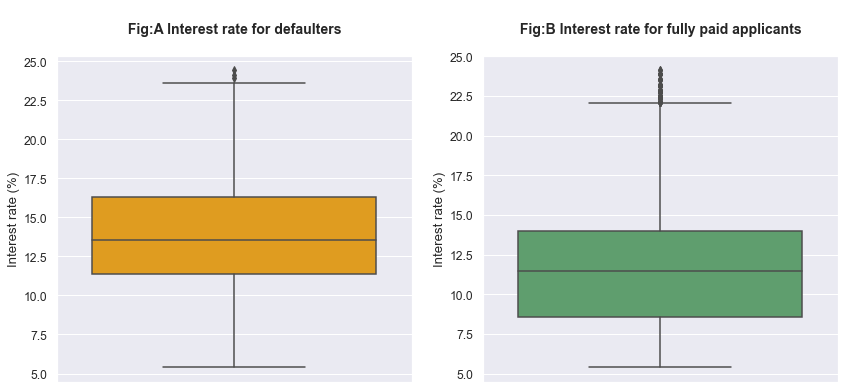

In [85]:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
sns.boxplot(y=defaulters.int_rate, color='orange')
plt.title("\n Fig:A Interest rate for defaulters \n", fontsize=14, fontweight='bold')
plt.ylabel('Interest rate (%)')


plt.subplot(1,2,2)
sns.boxplot(y=fully.int_rate, color='g')
plt.title("\n Fig:B Interest rate for fully paid applicants \n", fontsize=14, fontweight='bold')
plt.ylabel('Interest rate (%)')

plt.show()

### Observation-
When plotted box plots for both types of customers, apparently, from Fig: A, the interest rate for the interquartile population of defaulters approximately lies between 11.5% to 16.5% with the median being somewhere around 13.5%. Defaulters have interest rates as low as 5.5% and touch the highest figure of 24.5%.
__(Overlooking outliers).__

On the other hand, from Fig: B, the interquartile population of fully paid customers are having a comparatively lower range of interest rates with the median being stuck at 11.5%. The 50% population approximately falls between 8.5% to 14%, sinking to 5.5% and flying as high as 22%. __(Overlooking outliers).__

We can infer that __*higher slab of interest rates*__ could be one of the causes for applicants to __become defaulters.__

### 9. Let's see the comparison of total credit lines that our both type canditates holds-

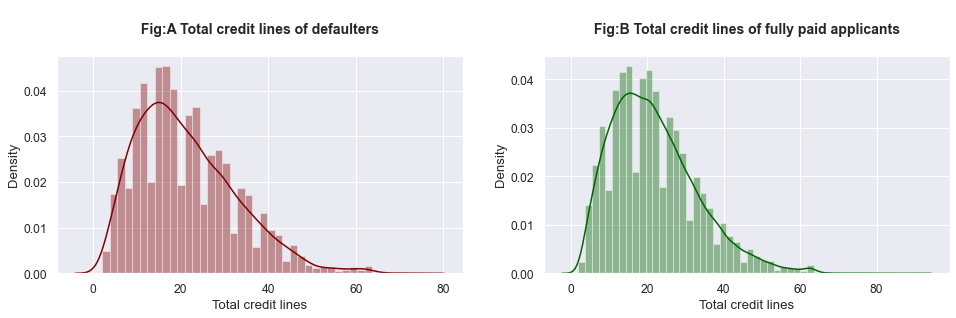

In [86]:
plt.figure(figsize=([16,4]))
plt.subplot(1,2,1)
sns.distplot(defaulters.total_acc, color='maroon')
plt.title("\n Fig:A Total credit lines of defaulters \n", fontsize=14, fontweight='bold')
plt.xlabel('Total credit lines')


plt.subplot(1,2,2)
sns.distplot(fully.total_acc, color='darkgreen')
plt.title("\n Fig:B Total credit lines of fully paid applicants \n", fontsize=14, fontweight='bold')
plt.xlabel('Total credit lines')

plt.show()

### Observation-
Both types of customers seem to have the same distribution for total accounts holding. Maximum population of both the type holds line of credits ranging from 10 to 40 numbers.

### 10. Also looking at the comparison of open credit lines that our both type canditates have-

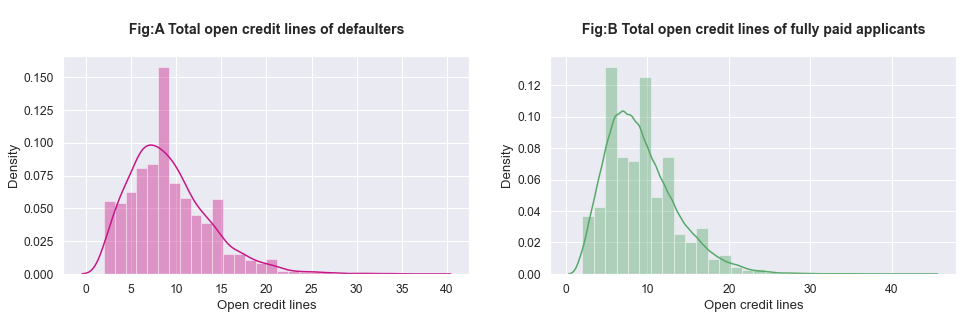

In [87]:
plt.figure(figsize=([16,4]))
plt.subplot(1,2,1)
sns.distplot(defaulters.open_acc, color='mediumvioletred', bins=30)
plt.title("\n Fig:A Total open credit lines of defaulters \n", fontsize=14, fontweight='bold')
plt.xlabel('Open credit lines')

plt.subplot(1,2,2)
sns.distplot(fully.open_acc, color='g',bins=30)
plt.title("\n Fig:B Total open credit lines of fully paid applicants \n", fontsize=14, fontweight='bold')
plt.xlabel('Open credit lines')

plt.show()

### Observation-
Both types of customers seem to have almost the same distribution for active lines of credit as well.

### 11. Finding relation between funded amount by investors and installments-

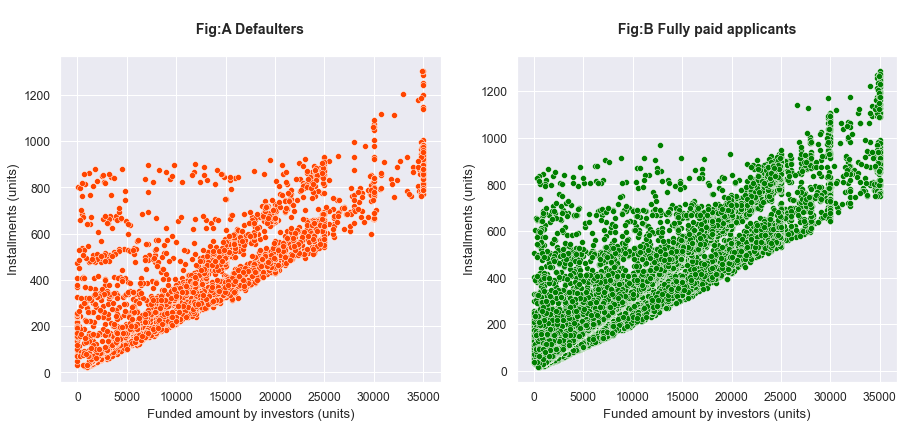

In [88]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=defaulters.funded_amnt_inv, y=defaulters.installment, color='orangered')
plt.title("\n Fig:A Defaulters \n", fontsize=14, fontweight='bold')
plt.xlabel('Funded amount by investors (units)')
plt.ylabel('Installments (units)')


plt.subplot(1,2,2)
sns.scatterplot(x=fully.funded_amnt_inv, y=fully.installment, color='green')
plt.title("\n Fig:B Fully paid applicants \n", fontsize=14, fontweight='bold')
plt.xlabel('Funded amount by investors (units)')
plt.ylabel('Installments (units)')

plt.show()

### Observation-
The scatter plot above depicts a very normal and obvious behavior between the amount funded by investors and the monthly installment amount.
There seems to be a close to perfect positive correlation between these two parameters for both customer types.

### 12. Gazing upon the relation between dti and interest rate for our two different type of customers-

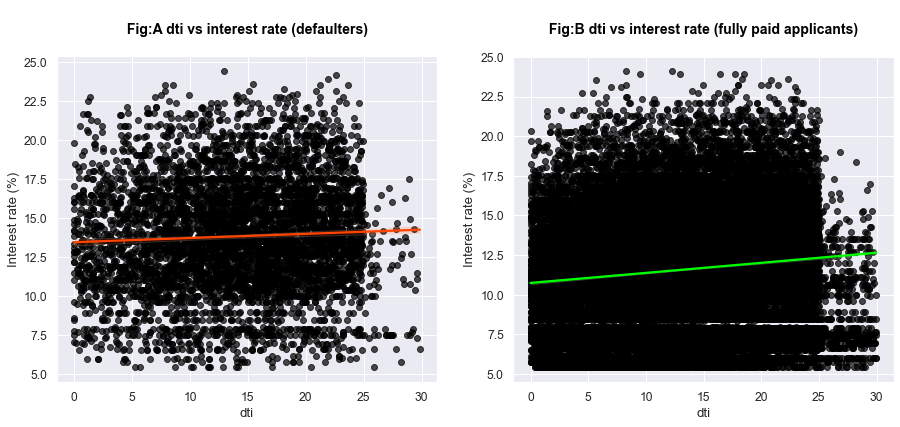

In [89]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.regplot(x='dti', y='int_rate', data=defaulters, scatter_kws={'color':'black', 'alpha':0.7}, line_kws={'color':'orangered'})
plt.title("\n Fig:A dti vs interest rate (defaulters) \n", fontsize=14, color='black', fontweight='bold')
plt.ylabel('Interest rate (%)')

plt.subplot(1,2,2)
sns.regplot(x='dti', y='int_rate', data=fully, scatter_kws={'color':'black', 'alpha':0.7}, line_kws={"color": "lime"})
plt.title("\n Fig:B dti vs interest rate (fully paid applicants) \n", fontsize=14, color='black', fontweight='bold')
plt.ylabel('Interest rate (%)')

plt.show()

### Observation-
From the above visual analysis, we can depict that the regression line in Fig: A, more or less, shows a close-to-zero correlation between the dti ratio and the interest rate for defaulters. The latter case which is for fully paid applicants comparatively communicates a more positive correlation between the dti ratio and the interest rate.
One can easily manifest that at any point on the abscissa which is the dti ratio, the corresponding interest rates for defaulters are in the higher slab. Therefore we can say that, even if few applicants try to maintain or have low dti, they have to pay more interest. In short term, it might not make much difference, but a long-tenured loan can put a tag on the borrower as Charged-off due to paying higher interest rates even after having low dti ratio. On the other hand, in Fig: B, the regression line is playing a fair game- people with low dti are awarded with low-interest rates and the ones with higher dti have a little higher interest rates.

*Had been the defaulters with lower dti imparted with lower interest rates, few of them might not be defaulters anymore.*

### 13. Analysing the annual income with respect to the employment length for both type of applicants-

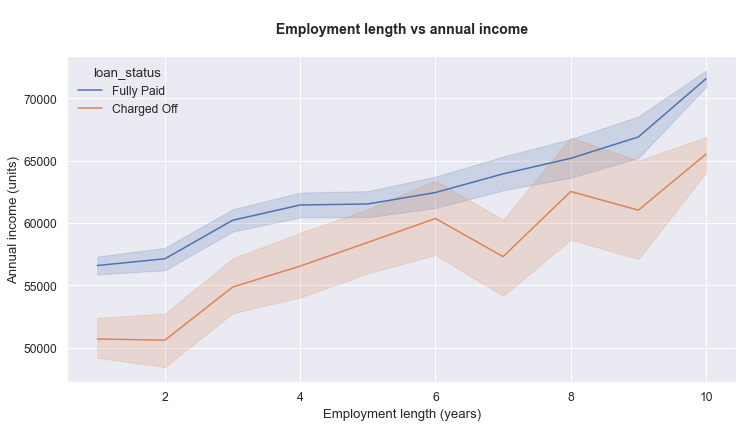

In [90]:
plt.figure(figsize=[12,6])
sns.lineplot(data=loan, x="emp_length", y="annual_inc", hue="loan_status")
plt.title("\n Employment length vs annual income \n", fontsize=14, fontweight='bold')
plt.xlabel('Employment length (years)')
plt.ylabel('Annual income (units)')


plt.show()

### Observation-
As seen from the above line plot, we can deduce that the annual income of defaulters is low compared to the annual income of good applicants for any given employment length.

Hence, a particular annual income at a particular employment length can be one of the qualifying parameters to differentiate between a future good customer who repays all the loan in time and a to-be defaulter. 

### 14. Employment length vs revolving balance-

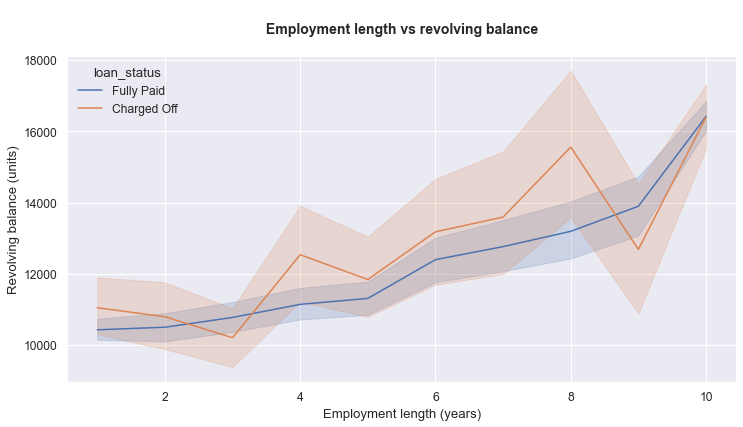

In [91]:
plt.figure(figsize=[12,6])
sns.lineplot(data=loan, x="emp_length", y="revol_bal", hue='loan_status')
plt.title("\n Employment length vs revolving balance \n", fontsize=14, fontweight='bold')
plt.xlabel('Employment length (years)')
plt.ylabel('Revolving balance (units)')

plt.show()

### Observation-
The distorted nature of the line above for charged-off customers shows that some defaulters with employment length between 2 years to 3.5 years seem to have a normal revolving balance as compared to the good customers with the same employment length. The ones falling in the employment length range of 3.5 years to 8.5 years appear to have a hard time repaying their balance in contrast to the good customers with the same employment range who are following a steady and gradual rising trend.

All in all, we can say that a higher revolving balance history concerning the employment length of any applicant could be a good indicator to detect a potential future defaulter.

### 15. Finding relation between funded amount by investors and total payment received-

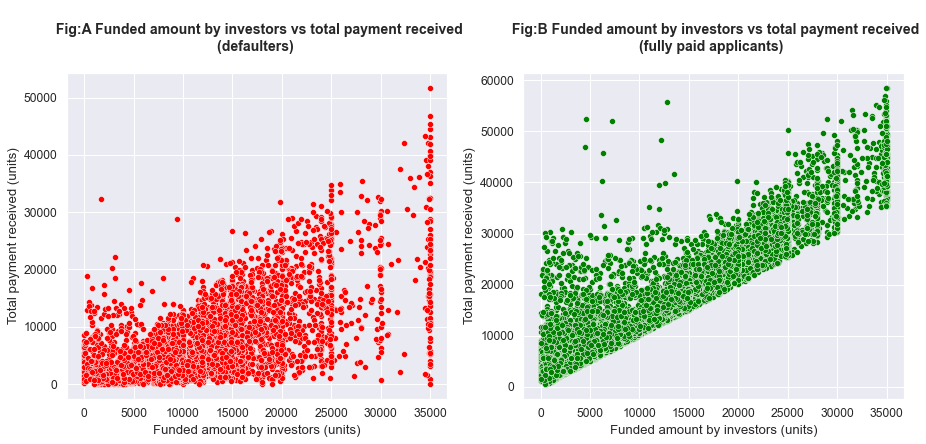

In [92]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=defaulters.funded_amnt_inv, y=defaulters.total_pymnt, color='red')
plt.title("\n Fig:A Funded amount by investors vs total payment received\n(defaulters) \n", fontsize=14, fontweight='bold')
plt.xlabel('Funded amount by investors (units)')
plt.ylabel('Total payment received (units)')

plt.subplot(1,2,2)
sns.scatterplot(x=fully.funded_amnt_inv, y=fully.total_pymnt, color='green')
plt.title("\n Fig:B Funded amount by investors vs total payment received\n(fully paid applicants) \n", fontsize=14, fontweight='bold')
plt.xlabel('Funded amount by investors (units)')
plt.ylabel('Total payment received (units)')
plt.show()

### Observation-
From Fig: A, we can say that after giving any amount of loan above 5000 units to defaulters, the total amount received is equal in some cases but majority of the time, the total amount received is less than the amount they were funded by investors and this can be seen by the presence of markers laying below the imaginary low inclined diagonal if drawn left to right upwards. This nature of scatter plot is depicting that they these applicants are very likely to get defaulted. Hence, if scatter plots are drawn from the loan payback history of a customer, and if the markers lies below this imaginary diagonal, it can help detect a defaulter.


On the contrary, in Fig: B, the good customers, are maintaining a close to perfect positive correlation between funded amount and paying back the total amount. This good customers are even paying more amount (interest rate) regularly corresponding to their funded amount which can be seen by the presence densely populated marker  sitting above an imaginary diagonal if drawn from left to right upwards, hence, resulting in more amount received from them to date. Additionally, the good customers are making sure they pay the entire principal amount and interest rate in given time.

Therefore we can infer that a fixed limit of lending loans should be set by referring to the past repaying history of a customer.


### 16. Let's look if we are able to find something fruitful from revolving utilization ratio-

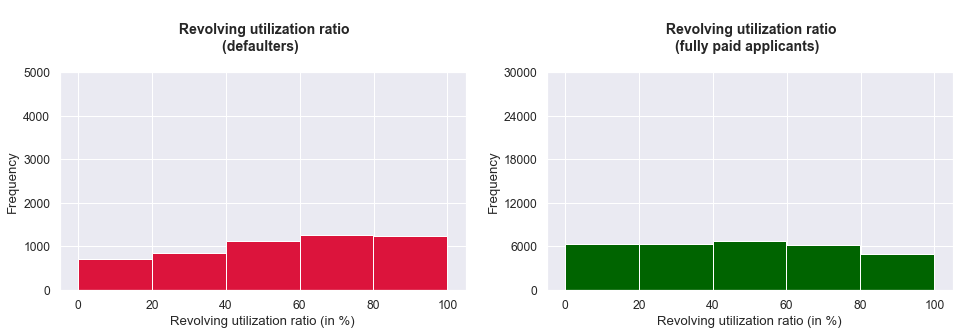

In [93]:
#revol_util- how much amount(in%) is the borrower utilizing the credits from all the open credit line he has.

plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
plt.hist(defaulters.revol_util, edgecolor='white', color='crimson', bins=5)
plt.yticks(np.arange(0,5206,1000), np.arange(0,5206,1000))
plt.title("\n Revolving utilization ratio\n(defaulters) \n", fontsize=14, fontweight='bold')
plt.xlabel('Revolving utilization ratio (in %)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(fully.revol_util, edgecolor='white', color='darkgreen', bins=5)
plt.yticks(np.arange(0,30593,6000), np.arange(0,30593,6000))
plt.title("\n Revolving utilization ratio\n(fully paid applicants) \n", fontsize=14, fontweight='bold')
plt.xlabel('Revolving utilization ratio (in %)')
plt.ylabel('Frequency')


plt.show()

### Observation-
From Fig:A, we can see that less proportion of defaulters(about 700) have maintained their revolving utilization ratio below 20% and a high portion of defaulter(about 2000) has revolvolving balance utilization ratio above 60%. This means that defaulters are relying too much on credits and using their available credit lines to the fullest.

On the other hand, from Fig:B, we can see that maximum population of good applicants(about 18000) has maintained their revolve utilization ratio below 60% and very less population of them(about 4000) have a higher revolve utilization ratio(above 80%).

Hence, the revolving utilization ratio can be a rescuing parameter for lending club which can help detect a potential defaulter.

### 17. Heatmap for loan data-

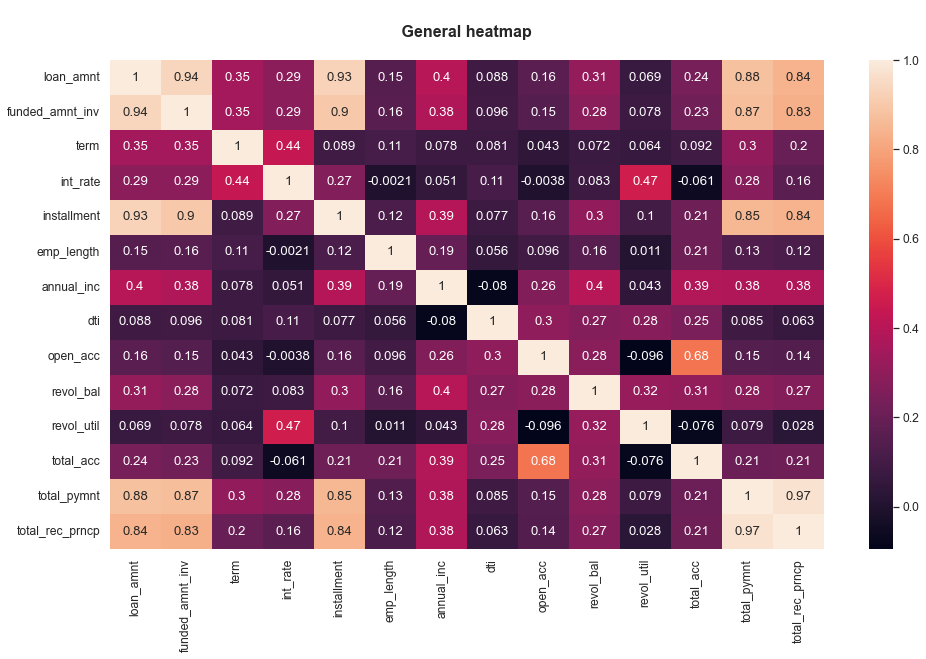

In [94]:
plt.figure(figsize=[16,9])
sns.heatmap(loan.corr(), annot=True)
plt.title("\n General heatmap \n", fontsize=16, fontweight='bold')
plt.show()

### Observation-
1. From the heat map above, we can see that the interest rate slightly negatively correlates with- __a).*the employment length of borrowers*__-(less employment length will result in higher interest rates and vice versa), __b).*the number of total credit lines and the total active credit lines they have*__-(holding and maintaining more line of credits will help one to keep their utilization ratio low which helps in increasing their credit score).


2. Apart from this, the annual income of borrower is also seen to have a negligible negative correlation with the debt to income ratio. -(having low annual income will lead one to utilize more credits from credit lines and vice versa).


3. The number of credit lines and the number of active credit lines a customer holds is also somewhat negatively correlated to revolving credit utilization ratio. -(higher utilization ratio means maximum use of available credit lines).

### 18. Heatmap for Defaulters-

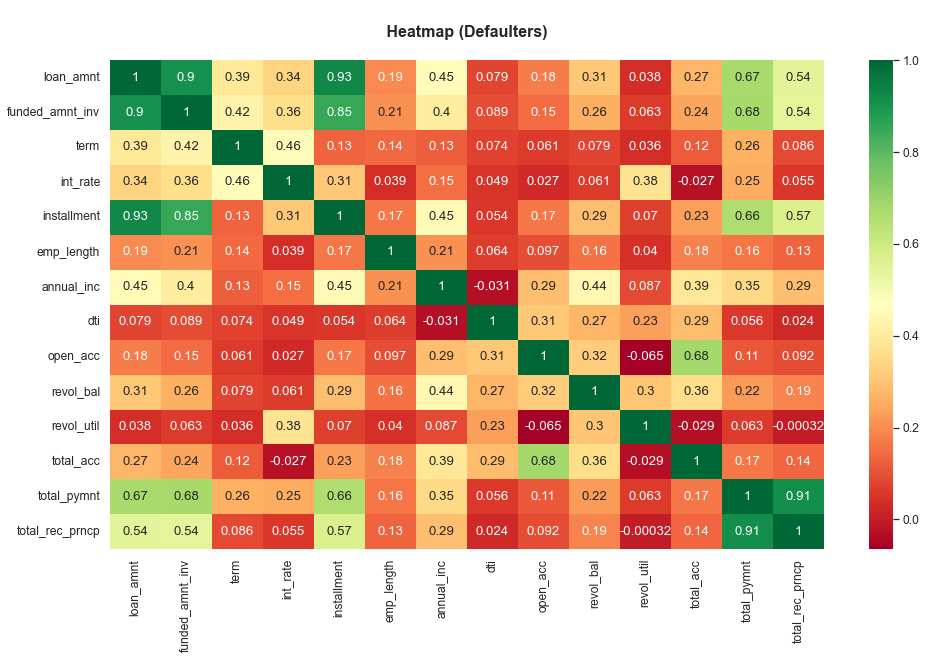

In [95]:
plt.figure(figsize=[16,9])
sns.heatmap(defaulters.corr(), annot=True, cmap='RdYlGn')
plt.title("\n Heatmap (Defaulters) \n", fontsize=16, fontweight='bold')
plt.show()

### Observation-
1. From the above heat map dedicated to charged-off customers only, we can depict that the low annual income of defaulters makes it hard for them to carry all their monthly debts resulting in shooting up their dti ratio. 


2. Also, one thing to notice here is that holding too many credit lines results in less interest rates. The reason for this is, that having multiple credit lines and using some portion of each of them over having one credit line and using it to the fullest, is a wise and bold move. Utilizing small credits from multiple credit lines will result in maintaining a good and low utilization ratio eventually resulting in building a good credit score.


3. Also, we can see that the revolving utilization ratio is negatively correlated with the total received principal. Customers(here defaulters) having higher utilization ratio are very unlikely to repay the complete principal amount. 


4. Having less line of total and active credits will surely increase the utilization ratio of available credit sources.


### 19. Heatmap for fully paid applicants-

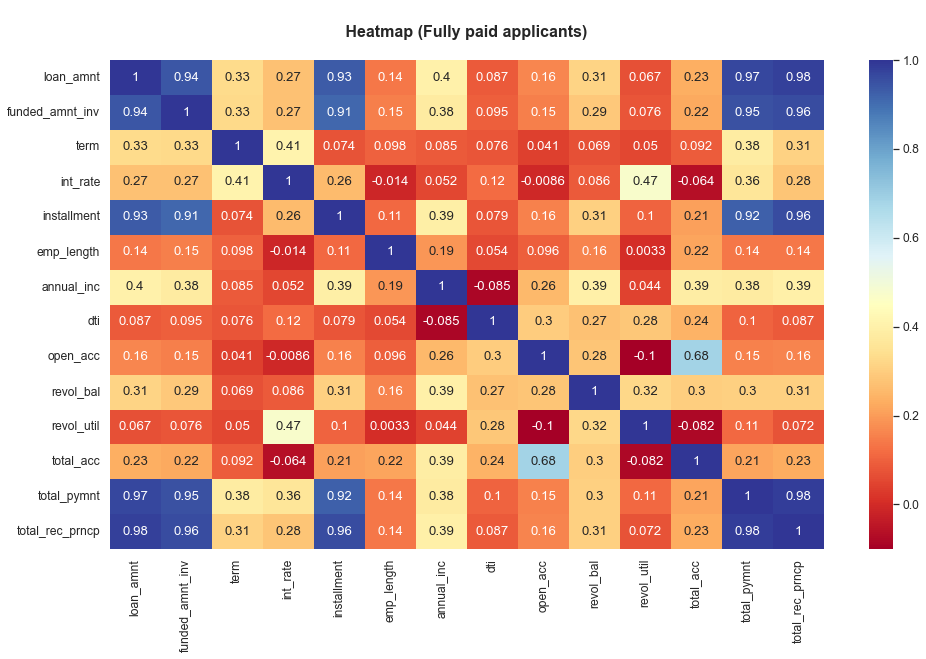

In [96]:
plt.figure(figsize=[16,9])
sns.heatmap(fully.corr(), annot=True, cmap='RdYlBu')
plt.title("\n Heatmap (Fully paid applicants) \n", fontsize=16, fontweight='bold')
plt.show()

### Observation-
1. In the heatmap for fully paid applicants, the additional information we can gain is that the higher employment length of good customers is awarding them with lower interest on loans.


2. The holding and using of multiple open credit lines and active credit lines and timely repaying the used credits from them, also helps good applicants to attract loans at lower interest rates.


3. Moreover, the higher annual income of good customers helps them to maintail a low dti ratio.


4. Apart from this, as opposed to defaulters, revolving utilization ratio in the above heatmap is positively correlated with the total received principal, again stating that good applicants are repaying the entire principal amount in time.


# Conclusion-

Hence, we can conclude that the following parameters are the driving factors and when combined and analyzed together, can help us predict the suspect(defaulter) in future-

1. Applicant opting for long-tenured loans.
2. Applicant is having higher interest rates on loan even after having a low dti ratio.
3. Low annual income of the applicant.
4. Higher revolving balance history of the applicant.
5. Payback history of the applicant.
6. Higher revolving utilization ratio of the applicant.

# Recommendation-

Even after having a low dti ratio, few applicants were imparted with higher interest rates on the loan which they opted for which seems unjust. Applicants having low dti should be awarded with a relatively lower interest rates to avoid them from getting defaulted.